# Decision Tree - Diabetes

## Basic EDA

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# read file using read_csv function
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# number of rows and columns
df.shape

(768, 9)

In [4]:
# data type of each column
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# summary of the data: column names, total no.of non-null values, data types, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# summary statistics for numeric data types
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# count of duplicate rows
df[df.duplicated()].shape

(0, 9)

## Decision Tree

#### as the data are of integer and float type we do not need to use "OneHotEncoder" or "LabelEncoder"

In [9]:
# iloc allows us to access specific rows and columns in a Dataframe by using integer indices
df.iloc[:, 0:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [11]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [13]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [14]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

#### Building Decision Tree Classifier using Entropy as a Criterion

In [15]:
# import the decisiontree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# Train the classifier on the training data
model = DecisionTreeClassifier(criterion='entropy',max_depth = 9, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

[Text(0.48961292613636365, 0.95, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1866122159090909, 0.85, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.06818181818181818, 0.75, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.022727272727272728, 0.65, 'x[6] <= 0.672\nentropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.011363636363636364, 0.55, 'entropy = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.03409090909090909, 0.55, 'x[6] <= 0.686\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.022727272727272728, 0.45, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.045454545454545456, 0.45, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.11363636363636363, 0.65, 'x[2] <= 37.0\nentropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.10227272727272728, 0.55, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.125, 0.55, 'x[6] <= 0.501\nentropy = 0.603\nsamples = 95\n

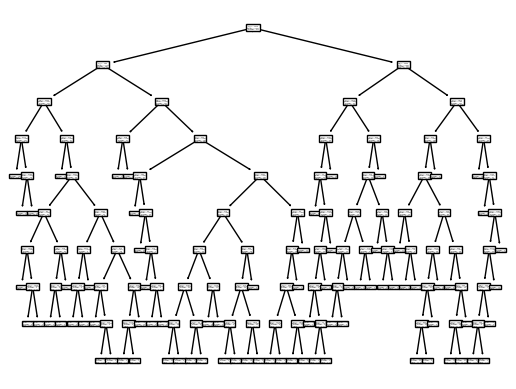

In [16]:
# visualizing decision tree
from sklearn import tree

tree.plot_tree(model)

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

[Text(0.48961292613636365, 0.95, 'Glucose <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]\nclass = No Diabetes'),
 Text(0.1866122159090909, 0.85, 'Age <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]\nclass = No Diabetes'),
 Text(0.06818181818181818, 0.75, 'BMI <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]\nclass = No Diabetes'),
 Text(0.022727272727272728, 0.65, 'DiabetesPedigreeFunction <= 0.672\nentropy = 0.068\nsamples = 124\nvalue = [123, 1]\nclass = No Diabetes'),
 Text(0.011363636363636364, 0.55, 'entropy = 0.0\nsamples = 108\nvalue = [108, 0]\nclass = No Diabetes'),
 Text(0.03409090909090909, 0.55, 'DiabetesPedigreeFunction <= 0.686\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]\nclass = No Diabetes'),
 Text(0.022727272727272728, 0.45, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Diabetes'),
 Text(0.045454545454545456, 0.45, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = No Diabetes'),
 Text(0.11363636363636363, 0.65, 'Blood

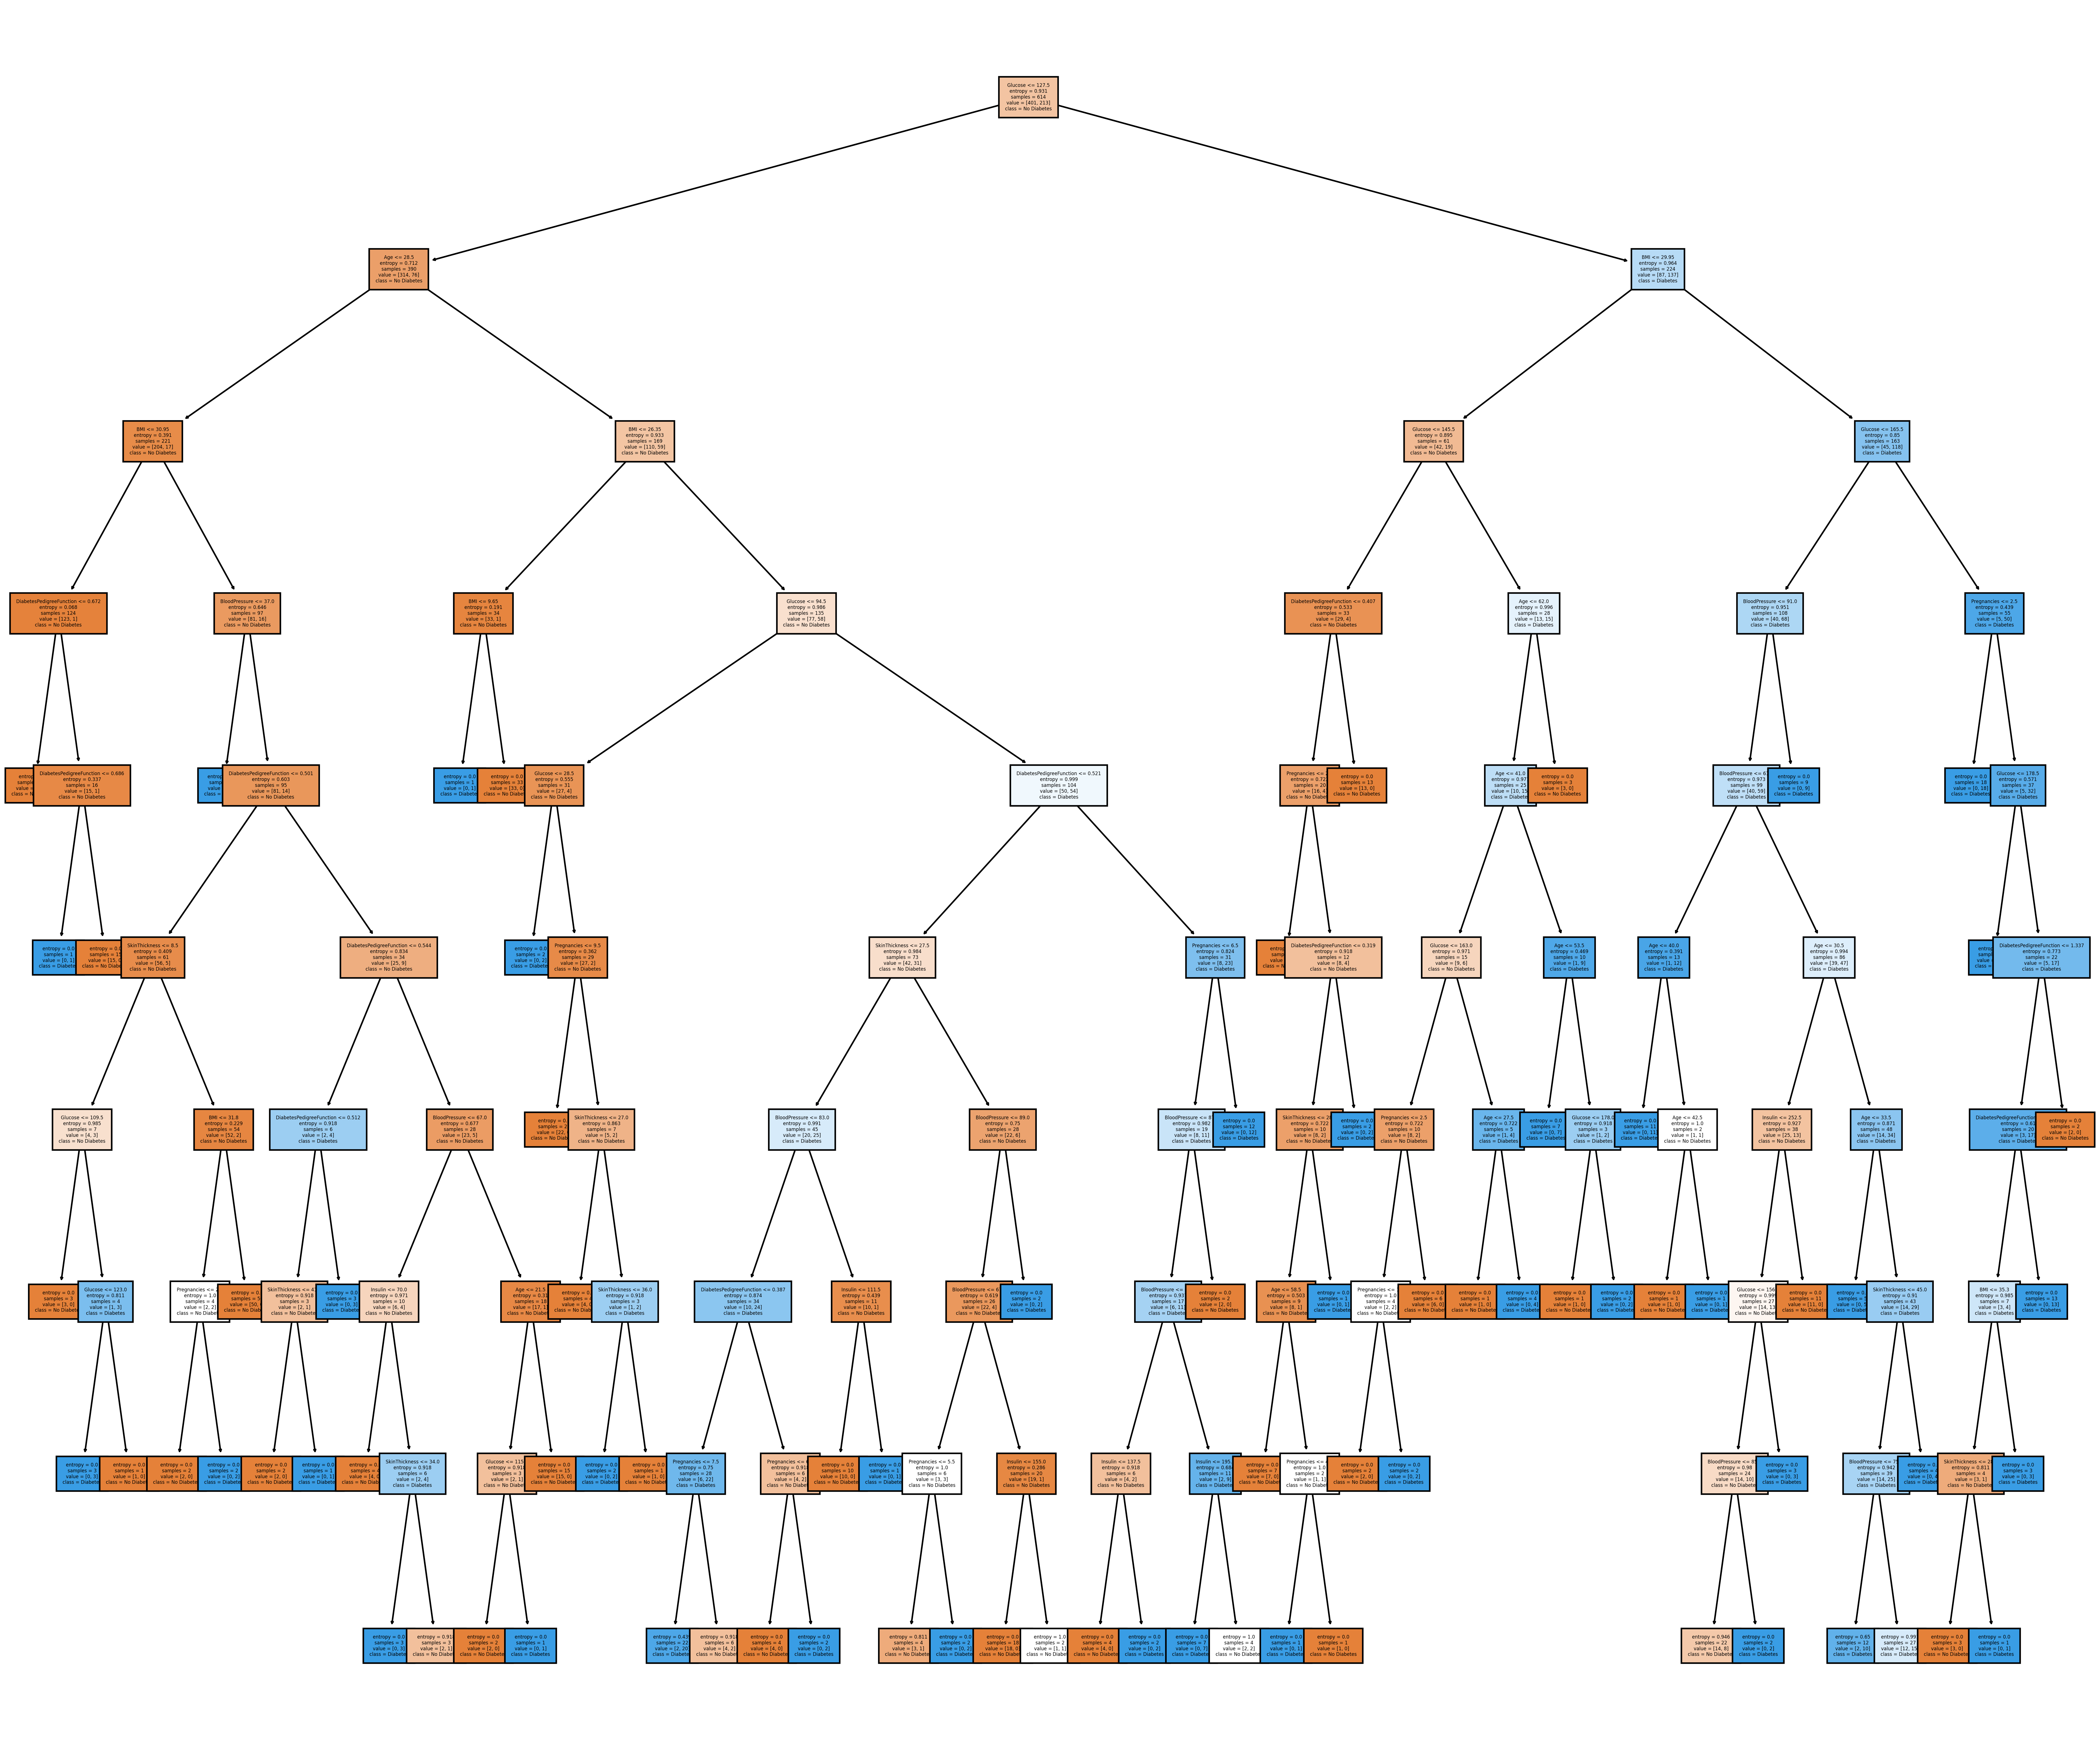

In [28]:
# visualizing decision tree with different parameters

fn = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
cn = ['No Diabetes', 'Diabetes']


fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(24, 20), dpi=400, width_ratios=[1], height_ratios=[1])
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True, ax=axes, fontsize=3)

#### Prediction on Test data

In [19]:
# make predictions on the test data

preds = model.predict(X_test)
preds

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [20]:
# make predictions on the training data

train_preds = model.predict(X_train)
train_preds

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [21]:
# convert to Pandas Series and get value counts

pd.Series(preds).value_counts()

0    93
1    61
Name: count, dtype: int64

#### Crosstab : Way to understand the two way table between predicted vs actual

In [22]:
pd.crosstab(y_test, preds, rownames=['Outcome (actual)'], colnames=['Outcome (predicted)'], margins=True, margins_name='Total')

Outcome (predicted),0,1,Total
Outcome (actual),,,
0,78,21,99
1,15,40,55
Total,93,61,154


#### Accuracy of the above model

In [23]:
#element-wise comparison between the elements of the preds array and the y_test array

mean_accuracy = np.mean(preds == y_test)
print(f"Accuracy: {mean_accuracy}")

Accuracy: 0.7662337662337663


In [24]:
from sklearn.metrics import accuracy_score

# evaluating the model's accuracy
accuracy = accuracy_score(y_test, preds, normalize=True)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7662337662337663


In [25]:
# evaluating the model's training accuracy
train_accuracy = accuracy_score(y_train, train_preds)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9495114006514658


In [26]:
# plotting the preds and y_test in the table for better understanding of how the values are compared and represented in the crosstab method

X_test['preds'] = preds
X_test['y_test'] = y_test
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,preds,y_test
668,6,98,58,33,190,34.0,0.430,43,1,0
324,2,112,75,32,0,35.7,0.148,21,0,0
624,2,108,64,0,0,30.8,0.158,21,0,0
690,8,107,80,0,0,24.6,0.856,34,0,0
473,7,136,90,0,0,29.9,0.210,50,0,0
...,...,...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49,1,1
534,1,77,56,30,56,33.3,1.251,24,0,0
344,8,95,72,0,0,36.8,0.485,57,1,0
296,2,146,70,38,360,28.0,0.337,29,1,1


In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Set the number of folds (e.g., k=6 for 6-fold cross-validation)
k_folds = 6

# Create a k-fold cross-validation object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Display the results
print("Cross-Validation Results:")
print(cv_results)
print(f"Mean Accuracy: {np.mean(cv_results)}")

Cross-Validation Results:
[0.7734375 0.703125  0.75      0.6875    0.71875   0.7109375]
Mean Accuracy: 0.7239583333333334
